# Reinforcement Learning

# 1. Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**.

In all considered models, rewards are attached to reached **states**. In games for instance, the reward of a state is +1 if you win, -1 if you loose, 0 in all other cases.


In [431]:
import sys
from pathlib import Path

lib_path = str(Path.cwd().parent)

if lib_path not in sys.path:
    sys.path.append(lib_path)
print(sys.path)

['C:\\Python312\\python312.zip', 'C:\\Python312\\DLLs', 'C:\\Python312\\Lib', 'C:\\Python312', 'd:\\Code\\Reinforcement Learning\\venv', '', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages\\win32', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages\\win32\\lib', 'd:\\Code\\Reinforcement Learning\\venv\\Lib\\site-packages\\Pythonwin', 'd:\\Code\\Reinforcement Learning']


In [432]:
import numpy as np

In [433]:
from lib.model import Walk, Maze

Each model is an object of the class `Environment` storing the current state.


In [434]:
from lib.model import Environment

In [435]:
methods_environment = [method for method in dir(Environment) if "__" not in method]
methods_environment

['decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_model',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reset',
 'show',
 'step']

The agent interacts with the environment and collects rewards.


In [436]:
from lib.agent import Agent

In [437]:
methods_agent = [method for method in dir(Agent) if "__" not in method]
methods_agent

['get_action',
 'get_actions',
 'get_episode',
 'get_gains',
 'one_step_policy',
 'random_policy']

## Walk

We start with a walk in a square. Some states (to be found) have positive rewards. Some wind (unknown) disturbs the walk.


In [438]:
# environment
model = Walk()

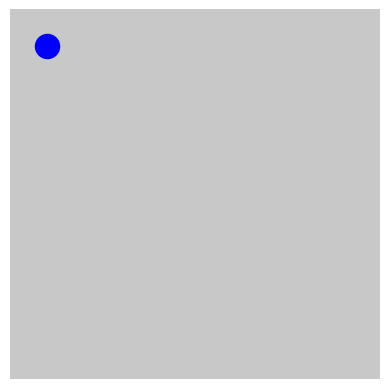

In [439]:
model.display()

In [440]:
model.Size

(5, 5)

In [441]:
# rewards (to be discovered)
model.Rewards

{(1, 1): 1, (1, 3): -1, (3, 1): -1, (3, 3): 3}

In [442]:
# wind (move probabilities)
model.Wind

{(0, 1): 0.75}

In [443]:
state = model.state

In [444]:
state

array([0, 0])

In [445]:
model.get_actions(state)

[(0, 1), (1, 0)]

In [446]:
action = (0, 1)

In [447]:
model.step(action)

(0, False)

In [448]:
model.state

array([0, 1])

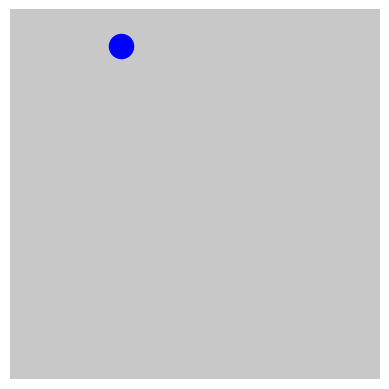

In [449]:
model.display()

In [450]:
# agent with random policy (default)
agent = Agent(model)

In [451]:
state = model.state
action = agent.get_action(state)

In [452]:
state

array([0, 1])

In [453]:
action

(1, 0)

In [454]:
# interaction with the environment
reward, stop = model.step(action)

In [455]:
reward

0

In [456]:
stop

False

In [457]:
# all possible actions
agent.get_actions(state)

[(0, 1), (0, -1), (1, 0)]

In [458]:
# policy of the agent
probs, actions = agent.policy(state)

In [459]:
print(probs)

[0.33333333 0.33333333 0.33333333]


In [460]:
print(actions)

[(0, 1), (0, -1), (1, 0)]


In [461]:
# an episode
stop, states, rewards = agent.get_episode(horizon=50)

In [462]:
# the episode includes the initial state
len(states)

51

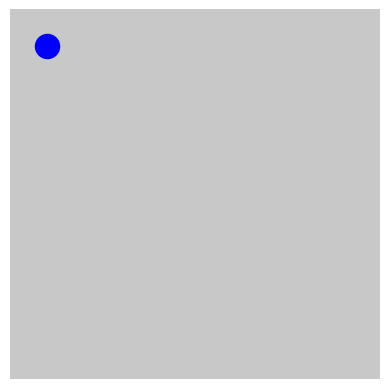

In [463]:
# display
animation = model.display(states)

In [464]:
animation

In [465]:
# initial reward = 0 by convention
len(rewards)

50

In [466]:
np.sum(rewards)

np.int64(9)

In [467]:
# gains from initial state, with discount factor
gains = agent.get_gains(n_runs=10, horizon=100, gamma=0.9)
np.mean(gains)

np.float64(0.012540178029196557)

## To do


- Test the weighted random policy where the probability of each move is proportional to its weight.
- Is this policy better than the (pure) random policy?


In [468]:
weights = {(0, 1): 2, (1, 0): 2, (0, -1): 1, (-1, 0): 1}

In [469]:
def weighted_random_policy(state, weights=weights):
    actions = Walk().get_actions(state)
    # to be modified
    probs = np.array([weights[action] for action in actions])

    if np.sum(probs):
        probs = probs / np.sum(probs)
    else:
        probs = np.ones(len(actions)) / len(actions)

    return probs, actions

In [470]:
agent = Agent(model, policy=weighted_random_policy)

In [471]:
gains = agent.get_gains(n_runs=10, horizon=100, gamma=0.9)
np.mean(gains)

np.float64(0.8054690066683241)

## Maze

Now let's try to escape a maze!


In [472]:
maze_map = np.load("../lib/maze.npy")

In [473]:
init_state = (1, 0)
exit_state = (1, 20)
Maze.set_parameters(maze_map, init_state, [exit_state])

In [474]:
model = Maze()

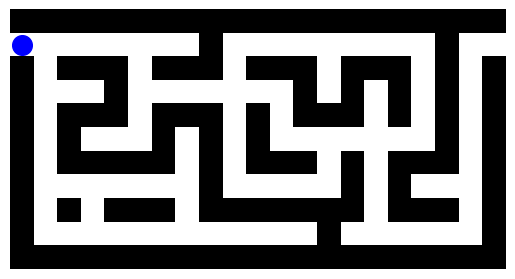

In [475]:
model.display()

In [476]:
model.state

array([1, 0])

In [477]:
state = model.state
reward = model.get_reward(state)

In [478]:
# -1 in any state except the exit
reward

-1

In [479]:
model.get_actions(state)

[(0, 1)]

In [480]:
action = (0, 1)

In [481]:
model.step(action)

(-1, False)

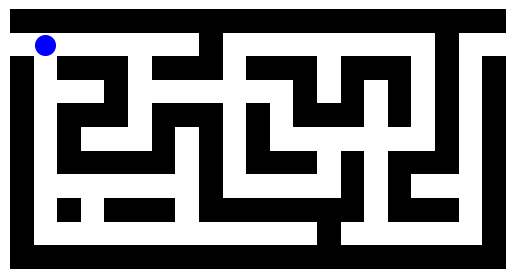

In [482]:
model.display()

In [483]:
# agent with random policy
agent = Agent(model)

In [484]:
stop, states, rewards = agent.get_episode(horizon=200)

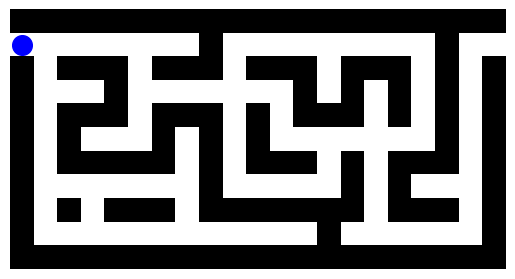

In [485]:
animation = model.display(states)

In [486]:
animation

In [487]:
# time in the Maze
-np.sum(rewards)

np.int64(200)

## To do


- Test the weighted random policy.
- Which choice of the weights looks the best for this maze?


In [488]:
weights = {(0, 1): 5, (1, 0): 2, (-1, 0): 2, (0, -1): 1}

In [489]:
def weighted_random_policy(state, weights=weights):
    actions = Maze().get_actions(state)
    # to be modified
    probs = np.array([weights[action] for action in actions])

    if np.sum(probs):
        probs = probs / np.sum(probs)
    else:
        probs = np.ones(len(actions)) / len(actions)

    return probs, actions

In [490]:
agent = Agent(model, policy=weighted_random_policy)

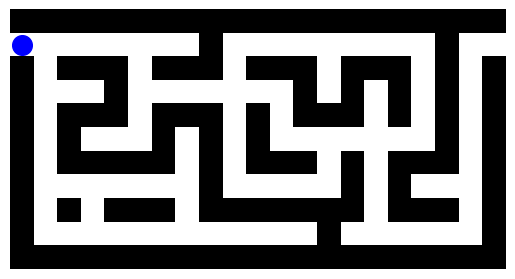

In [491]:
stop, states, rewards = agent.get_episode(horizon=1000)
animation = model.display(states)

In [492]:
animation

## Games

Finally, let's play games!<br>
Note that in most games:

- you play against an adversary (which is part of the environment),
- you may play first or second,
- when your adversary plays, you have only one possible action (let your adversary play),
- you can also impose an action to your adversary (useful for training).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim), [Connect Four](https://en.wikipedia.org/wiki/Connect_Four) and [Five in a row](https://en.wikipedia.org/wiki/Gomoku).
Feel free to add more :-)


In [493]:
from lib.model import TicTacToe, Nim, ConnectFour, FiveInRow

Each game is an object of the class `Game`.


In [494]:
from lib.model import Game

In [495]:
methods_game = [method for method in dir(Game) if "__" not in method]
methods_game

['Board_Size',
 'decode',
 'display',
 'encode',
 'get_actions',
 'get_all_actions',
 'get_all_states',
 'get_available_actions',
 'get_model',
 'get_next_state',
 'get_reward',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reset',
 'show',
 'step']

The method `get_next_state` allows you to get the next state for any (state, action) pair, without modifying the current state. This will be useful to learn good policies.

The method `get_available_actions` gives the available actions, ignoring the player.


In [496]:
set(methods_game) - set(methods_environment)

{'Board_Size', 'get_available_actions', 'get_next_state'}

## Tic-Tac-Toe


We start with Tic-Tac-Toe.


### Play first


In [497]:
# game against a random player (default)
game = TicTacToe()

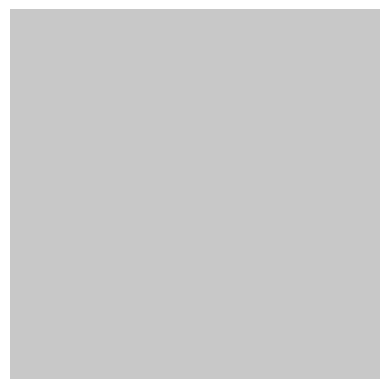

In [498]:
game.display()

In [499]:
# next player, board
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [500]:
# your possible actions
game.get_actions(game.state)

[(np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(1)),
 (np.int64(0), np.int64(2)),
 (np.int64(1), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(1), np.int64(2)),
 (np.int64(2), np.int64(0)),
 (np.int64(2), np.int64(1)),
 (np.int64(2), np.int64(2))]

In [501]:
# next state given some move
game.get_next_state(game.state, (1, 1))

(-1,
 array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]))

In [502]:
# the state is not modified
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [503]:
# you play at random (default)
agent = Agent(game)

In [504]:
# you play as player 1 (default)
agent.player

1

In [505]:
# your adversary plays as player -1
game.adversary.player

-1

In [506]:
state = game.state
action = agent.get_action(state)

In [507]:
action

(np.int64(0), np.int64(0))

In [508]:
reward, stop = game.step(action)

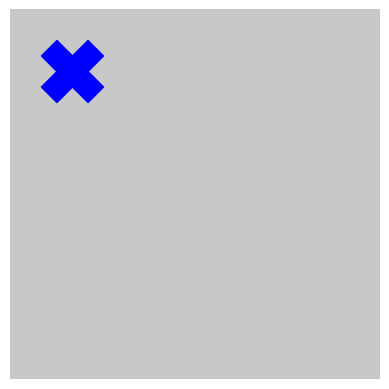

In [509]:
# you're blue
game.display()

In [510]:
game.state

(-1,
 array([[1, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [511]:
# all possible moves
game.get_actions(game.state)

[None]

In [512]:
# your moves (not your turn)
agent.get_actions(game.state)

[None]

In [513]:
action = agent.get_action(game.state)

In [514]:
print(action)

None


In [515]:
reward, stop = game.step(action)

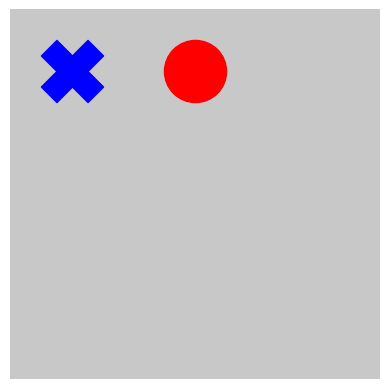

In [516]:
game.display()

In [517]:
stop, states, rewards = agent.get_episode()

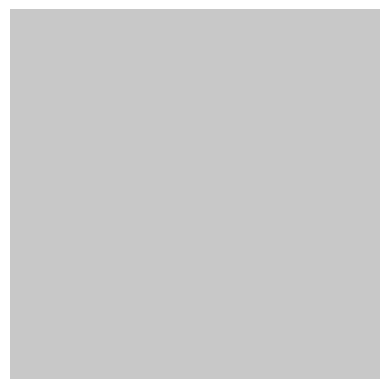

In [518]:
animation = game.display(states)

In [519]:
animation

In [520]:
rewards

[0, 0, 0, 0, 0, 0, 0, -1]

In [521]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([28, 12, 60]))

### Play second


In [522]:
# your adversary starts
game = TicTacToe(play_first=False)

In [523]:
game.first_player

-1

In [524]:
# you still play at random
agent = Agent(game)

In [525]:
stop, states, rewards = agent.get_episode()

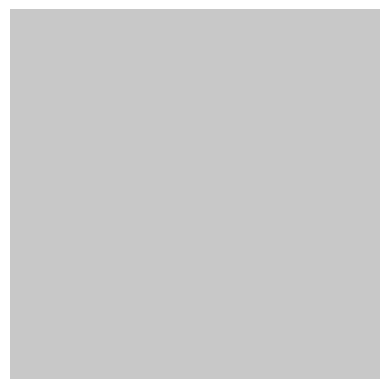

In [526]:
animation = game.display(states)

In [527]:
# you're still blue, red starts
animation

In [528]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [529]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([71,  9, 20]))

### Control your adversary

You can force the actions of your adversary (useful for training).


In [530]:
game = TicTacToe()

In [531]:
actions = [(0, 0), (1, 1), (0, 2), (2, 2), (0, 1)]

In [532]:
for action in actions:
    game.step(action)

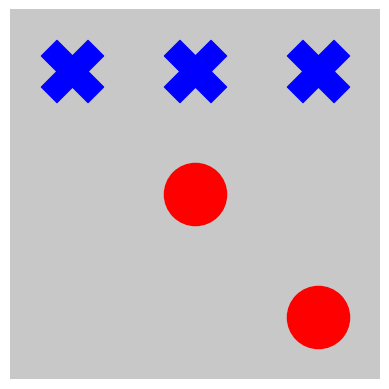

In [533]:
game.display()

### One step ahead


In [534]:
# your adversary is random
game = TicTacToe()

In [535]:
# you play with one-step ahead policy
agent = Agent(game, policy="one_step")

In [536]:
stop, states, rewards = agent.get_episode()

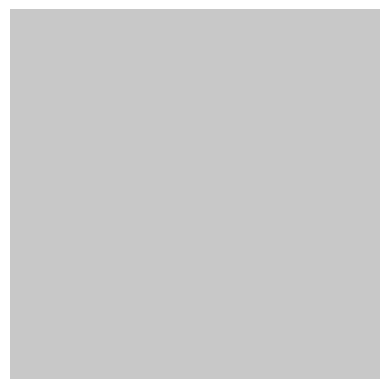

In [537]:
animation = game.display(states)

In [538]:
animation

In [539]:
gains = agent.get_gains()
np.unique(agent.get_gains(), return_counts=True)

(array([0, 1]), array([ 3, 97]))

In [540]:
# your adversary also looks one-step ahead
game = TicTacToe(adversary_policy="one_step")

In [541]:
agent = Agent(game, policy="one_step")

In [542]:
stop, states, rewards = agent.get_episode()

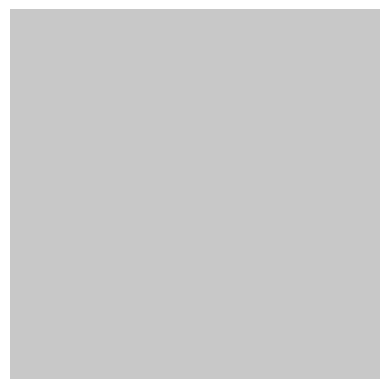

In [543]:
animation = game.display(states)

In [544]:
animation

In [545]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  0,  1]), array([14, 58, 28]))

## Nim


### Random players


In [546]:
# game against a random player (default)
game = Nim()

In [547]:
game.state

(1, array([1, 3, 5, 7]))

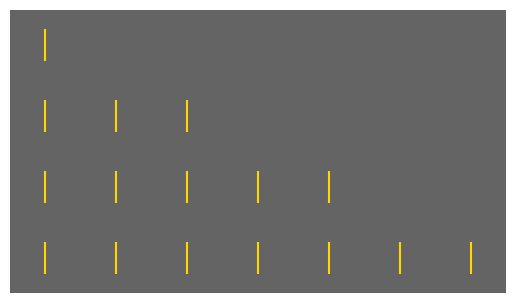

In [548]:
game.display()

In [549]:
# player, board
game.state

(1, array([1, 3, 5, 7]))

In [550]:
# you play at random
agent = Agent(game)

In [551]:
state = game.state
action = agent.get_action(state)

In [552]:
action

(np.int64(3), 1)

In [553]:
reward, stop = game.step(action)

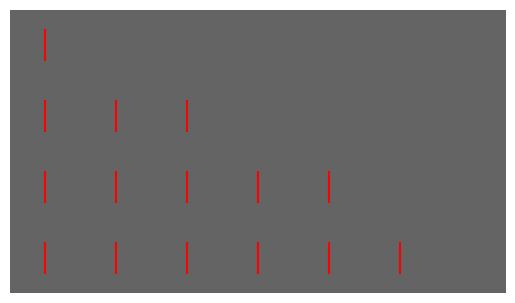

In [554]:
game.display()

In [555]:
stop, states, rewards = agent.get_episode()

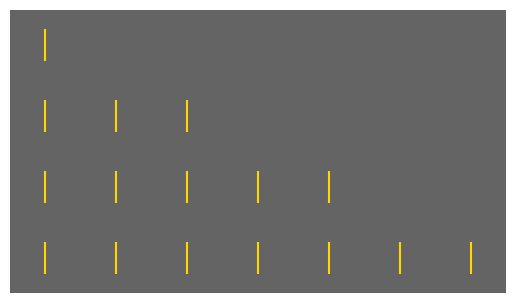

In [556]:
animation = game.display(states)

In [557]:
animation

In [558]:
rewards

[0, 0, 0, 0, 0, 0, 0, 1]

In [559]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  1]), array([52, 48]))

### One step ahead


In [560]:
game = Nim(adversary_policy="one_step")

In [561]:
agent = Agent(game, policy="one_step")

In [562]:
np.unique(agent.get_gains(), return_counts=True)

(array([-1,  1]), array([52, 48]))

## Connect Four


### Random players


In [563]:
# game against a random player
game = ConnectFour()

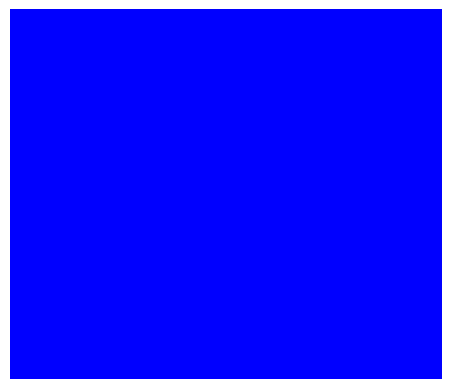

In [564]:
game.display()

In [565]:
game.state

(1,
 array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]))

In [566]:
# you play at random
agent = Agent(game)

In [567]:
stop, states, rewards = agent.get_episode()

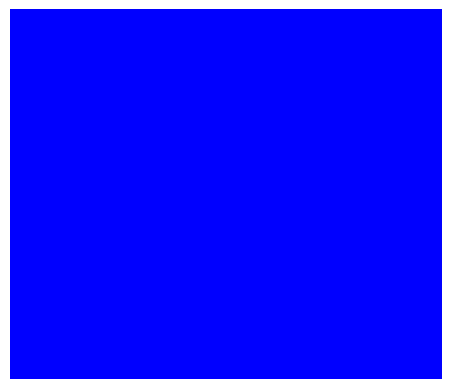

In [568]:
animation = game.display(states)

In [569]:
# you play yellow
animation

In [570]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([3, 7]))

### One step ahead


In [571]:
game = ConnectFour(adversary_policy="one_step")

In [572]:
agent = Agent(game, policy="one_step")

In [573]:
stop, states, rewards = agent.get_episode()

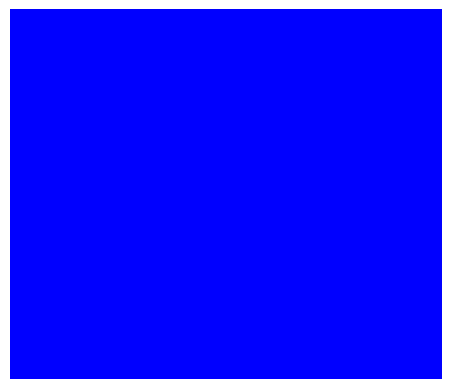

In [574]:
animation = game.display(states)

In [575]:
animation

In [576]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([3, 7]))

## Five-in-a-row


### Random players


In [577]:
game = FiveInRow()

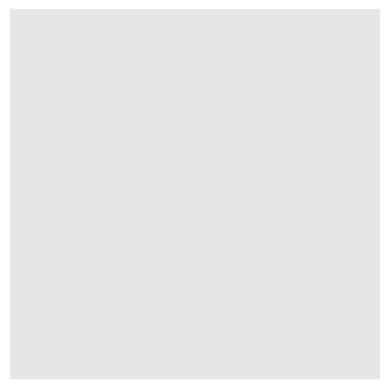

In [578]:
game.display()

In [579]:
agent = Agent(game)

In [580]:
stop, states, rewards = agent.get_episode()

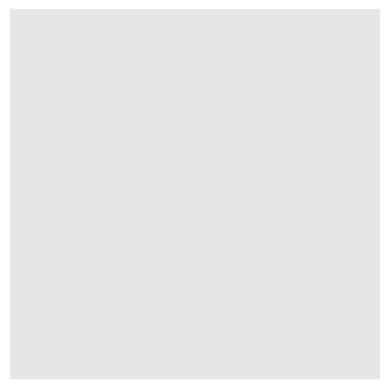

In [581]:
animation = game.display(states)

In [582]:
animation

In [583]:
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  1]), array([6, 4]))

### One step ahead


In [584]:
game = FiveInRow()

In [585]:
agent = Agent(game, policy="one_step")

In [586]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

(array([1]), array([5]))

In [587]:
# a better adversary
game = FiveInRow(adversary_policy="one_step")

In [588]:
agent = Agent(game, policy="one_step")

In [589]:
np.unique(agent.get_gains(n_runs=5), return_counts=True)

(array([-1,  0,  1]), array([3, 1, 1]))

## Value function

The value function of a policy can be computed from Bellman's equation, provided the state space is not too large.


You can check this condition by listing all states.


In [590]:
model = Walk()

In [591]:
len(model.get_all_states())

25

## To do

- Complete the method `evaluate_policy` of the class `PolicyEvaluation`.
- Evaluate the random policy in the `Walk` model and display the value function.
- Observe the impact of the wind on the value function.
- Display the value function of the random policy in the maze.


In [592]:
# we use sparse transition matrices
from scipy import sparse

In [593]:
class PolicyEvaluation:
    """Evaluation of a policy by dynamic programming.

    Parameters
    ----------
    model: object of class Environment
        Model.
    policy: function
        Policy of the agent.
    player: int
        Player for games (1 or -1, default = default player of the game).
    gamma: float
        Discount factor (between 0 and 1).
    n_eval: int
        Number of iterations of Bellman's equation for policy evaluation.
    """

    def __init__(self, model, policy="random", player=None, gamma=1, n_eval=100):
        self.model = model
        agent = Agent(model, policy, player)
        self.policy = agent.policy
        self.player = agent.player
        self.gamma = gamma
        self.n_eval = n_eval
        self.index_states()
        if self.n_states == 0:
            raise ValueError("Not applicable. The state space is too large.")
        self.get_rewards()
        self.get_transitions()

    def index_states(self):
        """Index all states."""
        self.states = self.model.get_all_states()
        self.n_states = len(self.states)
        self.state_id = {
            self.model.encode(state): i for i, state in enumerate(self.states)
        }

    def get_state_id(self, state):
        return self.state_id[self.model.encode(state)]

    def get_rewards(self):
        """Get the reward of each state."""
        rewards = np.zeros(self.n_states)
        for i, state in enumerate(self.states):
            rewards[i] = self.model.get_reward(state)
        self.rewards = rewards

    def get_actions(self, state, player=None):
        if self.model.is_game():
            if player is None:
                player = self.player
            actions = self.model.get_actions(state, player)
        else:
            actions = self.model.get_actions(state)
        return actions

    def get_transitions(self):
        """Get the transitions (probabilities to move from one state to another) for each action."""
        actions = self.model.get_all_actions()
        transitions = {
            action: sparse.lil_matrix((self.n_states, self.n_states))
            for action in actions
        }
        for i, state in enumerate(self.states):
            actions = self.get_actions(state)
            for action in actions:
                probs, next_states = self.model.get_transition(state, action)
                indices = np.array(
                    [self.get_state_id(next_state) for next_state in next_states]
                )
                transitions[action][i, indices] = np.array(probs)
        self.transitions = {
            action: sparse.csr_matrix(transition)
            for action, transition in transitions.items()
        }

    def evaluate_policy(self):
        """Evaluate a policy by iteration of Bellman's equation."""
        transitions = self.transitions
        # probability of each action over the states
        probs = {action: np.zeros(self.n_states) for action in transitions}
        for state in self.states:
            i = self.get_state_id(state)
            for prob, action in zip(*self.policy(state)):
                probs[action][i] = prob
        # Bellman's equation
        values = np.zeros(self.n_states)
        for _ in range(self.n_eval):
            next_values = self.rewards + self.gamma * values
            values = np.zeros(self.n_states)
            for action, transition in transitions.items():
                values += probs[action] * transition.dot(next_values)
        self.values = values

In [594]:
model = Walk()
agent = Agent(model)
random_policy = agent.policy

In [595]:
model.Wind

{(0, 1): 0.75}

In [596]:
gamma = 0.9
algo = PolicyEvaluation(model, random_policy, gamma=gamma)

In [597]:
algo.evaluate_policy()

In [598]:
values = algo.values

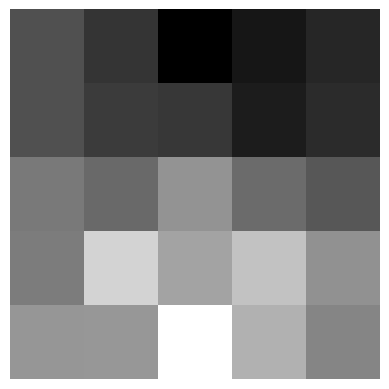

In [599]:
model.display_values(values)

In [600]:
gains = agent.get_gains(gamma=gamma)
np.mean(gains)

np.float64(0.527163594800355)

In [601]:
state = model.init_state()
i = algo.get_state_id(state)
values[i]

np.float64(0.42510360137207454)

In [602]:
wind = {(0, 1): 0.75}
Walk.set_parameters(Walk.Size, Walk.Rewards, wind)

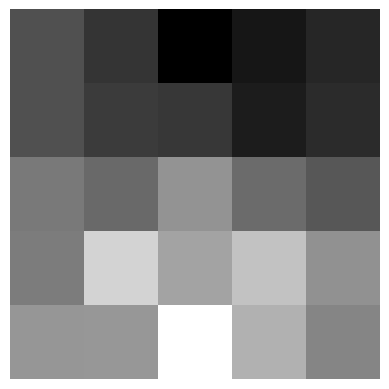

In [603]:
model = Walk()

algo = PolicyEvaluation(model, random_policy, gamma=gamma)
algo.evaluate_policy()

values = algo.values
model.display_values(values)

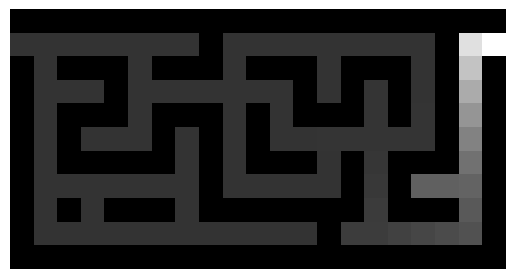

In [604]:
model = Maze()

algo = PolicyEvaluation(model)
algo.evaluate_policy()

values = algo.values
model.display_values(values)

## To do

- Evaluate the random policy and the one-step policy in some games, when possible.
- Do the same when the adversary plays with the one-step policy.
- Predict some first good moves for each of these game.
